<center>
<img src="https://i.ibb.co/b3T5hkz/logo.png" alt="logo" border="0" width=600>

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---


# W02A. Datos en Astrofísica


---
### A. Descargando datos del SDSS
Escriba una busqueda en SQL que permita encontrar en el SDSS (DS18), utilizando las tablas PhotoObj y SpecObj, los objetos localizados en la región con ascención recta entre 130.9 y 131, que sean mas brillantes que una magnitud  20.0 en la banda `g` y con un corrimiento al rojo (SpecObj) entre 0.2 y 0.5. Realice la conexión entre las dos tablas a través de objid (PhotoObj) y bestobjid (SpecObj) y obtenga las siguientes características: 

- Object ID (PhotoObj)
- ra 
- dec
- las 5 magnitudes u,g,r,i,z 
- specobjid (SpecObj)
- z o redhsift (SepcObj)

---
**Solución**

La estructura del query en SQL es

```
SELECT
p.objid,p.ra,p.dec,p.u,p.g,p.r,p.i,p.z,
s.specobjid, s.class, s.z as redshift

FROM PhotoObj AS p
JOIN SpecObj AS s ON s.bestobjid = p.objid

WHERE
p.ra BETWEEN 130.9 AND 131
AND p.g < 20.0
AND s.z BETWEEN 0.2 AND 0.5
```


---
### B. Análisis de los Datos obtenidos

1. Escriba un código que lea el archivo de datos descargado y determine el número de objetos obtenidos. Verifique cuantos objetos son de la clase 'GALAXY' y cuantos son 'QSO'.

2. Identifique la galaxia con el redshift más alto y el quasar con el redshift más pequeño.

---
**Solución**

Leemos el archivo con `Pandas`. Nótese que debemos indicar que la primera línea corresponde a los nombres de las columnas.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

df = pd.read_csv('Skyserver_data.csv', header=1)
df

,objid,ra,dec,u,g,r,i,z,specobjid,class,redshift
0,1237651753988915416,130.997103,1.565088,20.32475,18.56861,17.36517,16.84035,16.46884,525913485889005568,GALAXY,0.207425
1,1237654380901105838,130.992518,46.905600,24.70488,19.31927,17.91142,17.31980,17.22990,859162546609874944,GALAXY,0.214607
2,1237655108899897568,130.963659,46.151000,21.30680,19.80110,18.28865,17.74476,17.36508,5813247817226147840,GALAXY,0.268332
3,1237657118411522196,130.995082,40.049942,21.05086,19.29451,17.84302,17.30119,16.93587,933432908822112256,GALAXY,0.231659
4,1237657628437708885,130.998487,36.438471,22.66830,18.88865,17.65010,17.12255,16.75398,972785804772403200,GALAXY,0.209193
...,...,...,...,...,...,...,...,...,...,...,...
80,1237660765912105234,130.910602,31.439096,20.16052,19.91697,19.88828,19.70925,19.61655,12007888674601850880,QSO,0.499310
81,1237661065481880084,130.978868,7.835844,24.34053,19.50826,18.08200,17.51112,17.12924,5950403097654482944,GALAXY,0.215037
82,1237661126151504241,130.900717,29.071922,21.81485,19.82146,18.30156,17.65521,17.22510,5835622605433100288,GALAXY,0.297409
83,1237663529724739839,130.911327,56.906947,21.39725,19.19872,17.66272,17.11633,16.69916,2008619526819702784,GALAXY,0.235223


In [2]:
df['class']

0     GALAXY
1     GALAXY
2     GALAXY
3     GALAXY
4     GALAXY
       ...  
80       QSO
81    GALAXY
82    GALAXY
83    GALAXY
84       QSO
Name: class, Length: 85, dtype: object

In [4]:
df2 = df.groupby(['class'])['class'].count()
df2

class
GALAXY    74
QSO       11
Name: class, dtype: int64

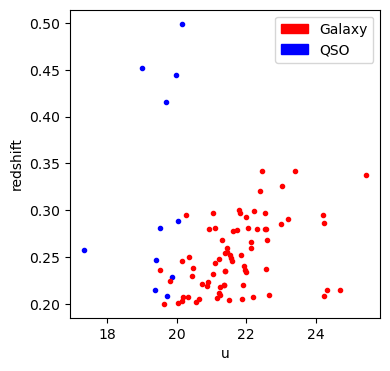

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colors = {'GALAXY': 'red',
          'QSO': 'blue'}

legend= [mpatches.Patch(color='red', label='Galaxy'), 
         mpatches.Patch(color='blue', label='QSO')]


plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['u'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])
plt.xlabel('u')
plt.ylabel('redshift')
plt.legend(handles = legend)
plt.show()

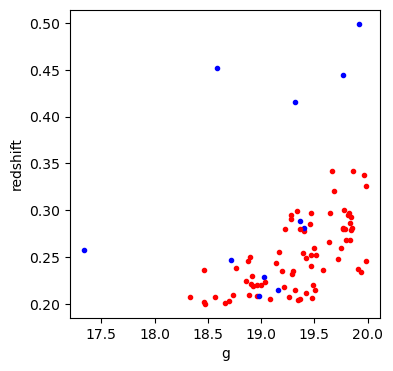

In [18]:
plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['g'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])

plt.xlabel('g')
plt.ylabel('redshift')
plt.show()

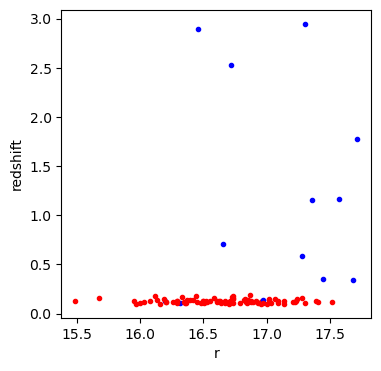

In [7]:
plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['r'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])
plt.xlabel('r')
plt.ylabel('redshift')
plt.show()

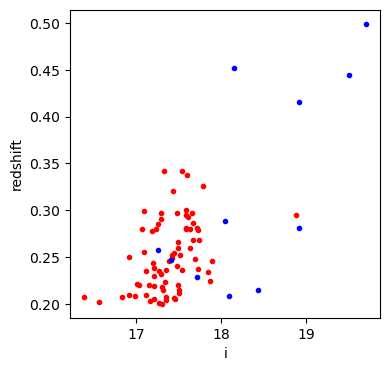

In [19]:
plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['i'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])
plt.xlabel('i')
plt.ylabel('redshift')
plt.show()

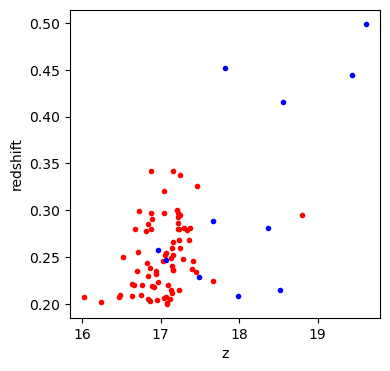

In [20]:
plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['z'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])
plt.xlabel('z')
plt.ylabel('redshift')
plt.show()

In [5]:
galaxies_df = df.groupby(['class']).get_group('GALAXY')

idx_max_redshift = galaxies_df['redshift'].idxmax()

df.iloc[idx_max_redshift]

objid        1237648722819875150
ra                    130.942431
dec                     1.141833
u                       22.45711
g                       19.86371
r                       18.16767
i                       17.54379
z                       17.16201
specobjid    4289771654719232000
class                     GALAXY
redshift                0.341903
Name: 12, dtype: object

In [6]:
QSO_df = df.groupby(['class']).get_group('QSO')

idx_min_redshift = QSO_df['redshift'].idxmin()

df.iloc[idx_min_redshift]

objid        1237658192150266161
ra                    130.922337
dec                    35.105485
u                       19.72082
g                       18.97895
r                       18.44812
i                        18.0944
z                       17.98213
specobjid    1051651580715100160
class                        QSO
redshift                 0.20814
Name: 63, dtype: object

---
### C. Índices de Color

1. Defina columnas en el dataframe con los índices de color `u-g`, `g-i`, `r-i` e `i-z` para cada uno de los objetos.


2. Realice una gráfica incluyendo todos los objetos, mostrando el índice de color `r-i` (eje vertical) vs. índice de color `u-g` (eje horizontal) e indicando el valor de redshift para cada objeto con una escala de color (utilice el mapa de color 'inferno').  

---
**Solución**

Agregamos las columnas de los índices de color

In [7]:
df['u-g'] = df['u'] - df['g']
df['g-i'] = df['g'] - df['i']
df['r-i'] = df['r'] - df['i']
df['i-z'] = df['i'] - df['z']
df

,objid,ra,dec,u,g,r,i,z,specobjid,class,redshift,u-g,g-i,r-i,i-z
0,1237651753988915416,130.997103,1.565088,20.32475,18.56861,17.36517,16.84035,16.46884,525913485889005568,GALAXY,0.207425,1.75614,1.72826,0.52482,0.37151
1,1237654380901105838,130.992518,46.905600,24.70488,19.31927,17.91142,17.31980,17.22990,859162546609874944,GALAXY,0.214607,5.38561,1.99947,0.59162,0.08990
2,1237655108899897568,130.963659,46.151000,21.30680,19.80110,18.28865,17.74476,17.36508,5813247817226147840,GALAXY,0.268332,1.50570,2.05634,0.54389,0.37968
3,1237657118411522196,130.995082,40.049942,21.05086,19.29451,17.84302,17.30119,16.93587,933432908822112256,GALAXY,0.231659,1.75635,1.99332,0.54183,0.36532
4,1237657628437708885,130.998487,36.438471,22.66830,18.88865,17.65010,17.12255,16.75398,972785804772403200,GALAXY,0.209193,3.77965,1.76610,0.52755,0.36857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1237660765912105234,130.910602,31.439096,20.16052,19.91697,19.88828,19.70925,19.61655,12007888674601850880,QSO,0.499310,0.24355,0.20772,0.17903,0.09270
81,1237661065481880084,130.978868,7.835844,24.34053,19.50826,18.08200,17.51112,17.12924,5950403097654482944,GALAXY,0.215037,4.83227,1.99714,0.57088,0.38188
82,1237661126151504241,130.900717,29.071922,21.81485,19.82146,18.30156,17.65521,17.22510,5835622605433100288,GALAXY,0.297409,1.99339,2.16625,0.64635,0.43011
83,1237663529724739839,130.911327,56.906947,21.39725,19.19872,17.66272,17.11633,16.69916,2008619526819702784,GALAXY,0.235223,2.19853,2.08239,0.54639,0.41717


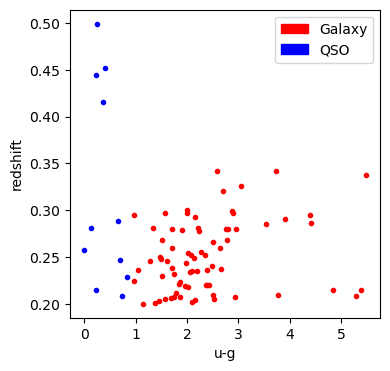

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colors = {'GALAXY': 'red',
          'QSO': 'blue'}

legend= [mpatches.Patch(color='red', label='Galaxy'), 
         mpatches.Patch(color='blue', label='QSO')]


plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['u-g'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])
plt.xlabel('u-g')
plt.ylabel('redshift')
plt.legend(handles = legend)
plt.show()

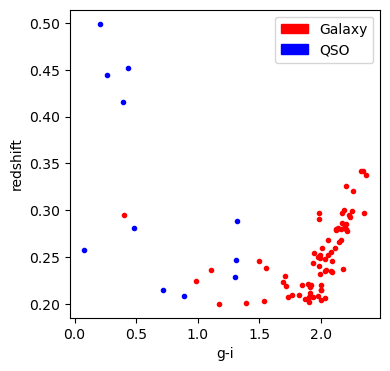

In [9]:
plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['g-i'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])
plt.xlabel('g-i')
plt.ylabel('redshift')
plt.legend(handles = legend)
plt.show()

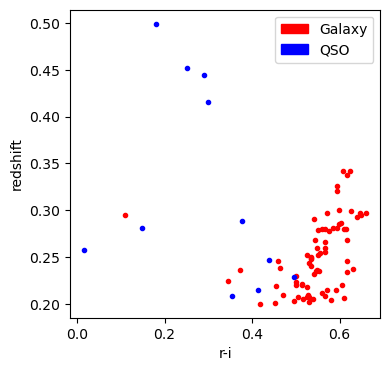

In [10]:
plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['r-i'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])
plt.xlabel('r-i')
plt.ylabel('redshift')
plt.legend(handles = legend)
plt.show()

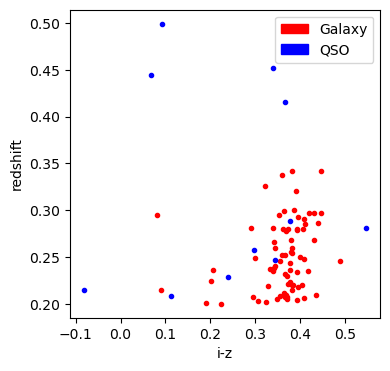

In [11]:
plt.figure(figsize=(4,4))
for i in range(len(df)):
    plt.scatter(df['i-z'][i],df['redshift'][i], marker='.', color=colors[df['class'][i]])
plt.xlabel('i-z')
plt.ylabel('redshift')
plt.legend(handles = legend)
plt.show()

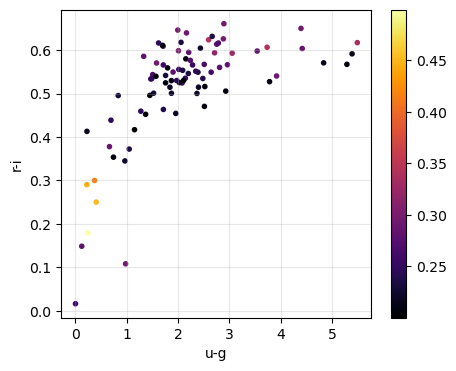

In [12]:
plt.figure(figsize=(5,4))
plt.scatter(df['u-g'],df['r-i'], marker='.', c=df['redshift'], cmap='inferno')
plt.xlabel('u-g')
plt.ylabel('r-i')
plt.colorbar()
plt.grid(alpha=0.3)
plt.show()

In [13]:
QSO_df = df.groupby(['class']).get_group('QSO')

idx_min_redshift = QSO_df['redshift'].idxmin()

df.iloc[idx_min_redshift]

objid        1237658192150266161
ra                    130.922337
dec                    35.105485
u                       19.72082
g                       18.97895
r                       18.44812
i                        18.0944
z                       17.98213
specobjid    1051651580715100160
class                        QSO
redshift                 0.20814
u-g                      0.74187
g-i                      0.88455
r-i                      0.35372
i-z                      0.11227
Name: 63, dtype: object